In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

from imodels.rule_list.bayesian_rule_list.bayesian_rule_list import BayesianRuleListClassifier

%matplotlib inline

In [2]:
def sigmoid(x):
    
    return np.exp(x)/(1+np.exp(x))

In [3]:
np.random.seed(405)
N = 200
col_names = ["x1", "x2", "x3"]
X_train = np.random.uniform(size = [N, 3])
X_train = pd.DataFrame(X_train, columns=col_names)
beta = [10,5,0]
y = np.random.binomial(n=1, p=sigmoid(X_train @ beta - 6))

In [4]:
kbins = KBinsDiscretizer(3, encode="ordinal")
X_disc = pd.DataFrame(kbins.fit_transform(X_train), columns=col_names).astype(int)
#X_disc

In [5]:
brl = BayesianRuleListClassifier()
brl2 = BayesianRuleListClassifier()

In [6]:
%%time

brl.fit(X_disc, y, feature_labels=col_names)

CPU times: user 17.2 s, sys: 63.5 ms, total: 17.3 s
Wall time: 17.3 s


BayesianRuleListClassifier(alpha=array([1., 1.]), class1label='class 1',
                           listlengthprior=3, listwidthprior=1, max_iter=50000,
                           maxcardinality=2, minsupport=0.1, n_chains=3,
                           random_state=42, verbose=False)

In [7]:
%%time

brl2.fit(X_disc, y, feature_labels=col_names, already_discrete=True)

CPU times: user 20.4 s, sys: 113 ms, total: 20.6 s
Wall time: 20.7 s


BayesianRuleListClassifier(alpha=array([1., 1.]), class1label='class 1',
                           listlengthprior=3, listwidthprior=1, max_iter=50000,
                           maxcardinality=2, minsupport=0.1, n_chains=3,
                           random_state=42, verbose=False)

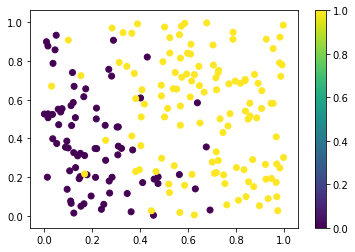

In [8]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y)
plt.colorbar()
plt.show()

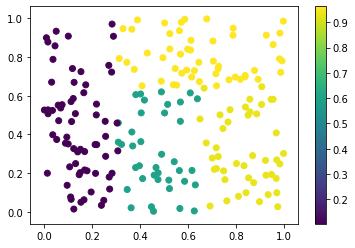

In [11]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=brl2.predict_proba(X_disc)[:,1])
plt.colorbar()
plt.show()

In [12]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=brl.predict_proba(X_disc)[:,1])
plt.colorbar()
plt.show()

UnboundLocalError: local variable 'X_df_onehot' referenced before assignment

In [ ]:
#print(brl)
print(brl2)

### Debugging

In [28]:
brl2.predict_proba(X_disc)[:3,:]

array([[0.89705882, 0.10294118],
       [0.06521739, 0.93478261],
       [0.89705882, 0.10294118]])

In [31]:
brl.predict_proba(X_disc).shape

(200, 2)

In [26]:
X_disc.head(3)

,x1,x2,x3
0,2,0,0
1,0,0,0
2,2,0,1


In [27]:
brl2.d_star

[4, 8, 3, 6, 0]

In [30]:
brl2.itemsets

['null',
 ['x3_0'],
 ['x2_0'],
 ['x1_2'],
 ['x1_0'],
 ['x3_1'],
 ['x1_1'],
 ['x2_1'],
 ['x2_2'],
 ['x3_2'],
 ['x3_2', 'x2_0'],
 ['x1_2', 'x2_0'],
 ['x1_2', 'x3_0'],
 ['x3_2', 'x1_2'],
 ['x1_2', 'x2_2'],
 ['x1_0', 'x3_0'],
 ['x1_0', 'x2_0'],
 ['x2_1', 'x1_0'],
 ['x3_2', 'x1_0'],
 ['x1_0', 'x3_1'],
 ['x3_1', 'x2_0'],
 ['x1_2', 'x3_1'],
 ['x1_1', 'x3_1'],
 ['x1_1', 'x3_0'],
 ['x1_1', 'x2_0'],
 ['x1_1', 'x2_2'],
 ['x2_1', 'x3_1'],
 ['x2_1', 'x3_0'],
 ['x3_2', 'x2_1'],
 ['x2_2', 'x3_0'],
 ['x3_2', 'x2_2']]

In [44]:
(X_disc["x1"] == 2) == (brl2.predict_proba(X_disc)[:,1] > 0.9)

0       True
1       True
2       True
3      False
4       True
       ...  
195     True
196    False
197     True
198    False
199     True
Name: x1, Length: 200, dtype: bool

In [25]:
X_disc.iloc[:3,:]

,x1,x2,x3
0,0,2,2
1,1,1,2
2,2,1,0


In [30]:
brl.d_star, brl.itemsets

([4, 3, 2, 0],
 ['null',
  ('x3_All',),
  ('x2_All',),
  ('x1_-inf_to_0.5',),
  ('x1_0.5_to_1.5',),
  ('x1_1.5_to_inf',),
  ('x2_All', 'x3_All'),
  ('x1_-inf_to_0.5', 'x2_All'),
  ('x1_-inf_to_0.5', 'x3_All'),
  ('x1_0.5_to_1.5', 'x2_All'),
  ('x1_0.5_to_1.5', 'x3_All'),
  ('x1_1.5_to_inf', 'x2_All'),
  ('x1_1.5_to_inf', 'x3_All')])

In [32]:
temp = brl.discretizer.apply_discretization(X_disc)
X2 = brl._to_itemset_indices(temp)

In [35]:
[len(itemset) for itemset in X2]

[200, 200, 200, 67, 66, 67, 200, 67, 67, 66, 66, 67, 67]

In [19]:
X_df_onehot = BayesianRuleListClassifier.recode_samples_for_fpgrowth(X_disc)
itemsets = brl2.itemsets
for c in X_df_onehot.columns:
    X_df_onehot[c] = [c if x == 1 else '' for x in list(X_df_onehot[c])]
X = [{}] * (len(itemsets) + 1)
X[0] = set(range(len(X_df_onehot)))  # the default rule satisfies all data
for (j, lhs) in enumerate(itemsets):
    X[j + 1] = set([i for (i, xi) in enumerate(X_df_onehot.values) if set(lhs).issubset(xi)])

In [59]:
brl2.d_star

[7, 22, 5, 2, 0]

In [24]:
itemsets

['null',
 ['x3_0'],
 ['x2_0'],
 ['x1_2'],
 ['x1_0'],
 ['x3_1'],
 ['x1_1'],
 ['x2_1'],
 ['x2_2'],
 ['x3_2'],
 ['x3_2', 'x2_0'],
 ['x1_2', 'x2_0'],
 ['x1_2', 'x3_0'],
 ['x3_2', 'x1_2'],
 ['x1_2', 'x2_2'],
 ['x1_0', 'x3_0'],
 ['x1_0', 'x2_0'],
 ['x2_1', 'x1_0'],
 ['x3_2', 'x1_0'],
 ['x1_0', 'x3_1'],
 ['x3_1', 'x2_0'],
 ['x1_2', 'x3_1'],
 ['x1_1', 'x3_1'],
 ['x1_1', 'x3_0'],
 ['x1_1', 'x2_0'],
 ['x1_1', 'x2_2'],
 ['x2_1', 'x3_1'],
 ['x2_1', 'x3_0'],
 ['x3_2', 'x2_1'],
 ['x2_2', 'x3_0'],
 ['x3_2', 'x2_2']]

In [23]:
[len(itemset) for itemset in X]

[200,
 0,
 67,
 67,
 67,
 66,
 66,
 67,
 66,
 67,
 67,
 23,
 25,
 20,
 26,
 23,
 23,
 21,
 30,
 22,
 21,
 26,
 21,
 24,
 24,
 21,
 29,
 24,
 20,
 22,
 29,
 22]

Fitting seems to be ok. Investigating why predict_proba is making mistakes.

In [32]:
#brl2.predict_proba(X_disc)

In [25]:
print(brl)

Trained RuleListClassifier 
IF x1_1.5_to_inf THEN probability of class 1: 94.2% (87.6%-98.4%)
ELSE IF x2_-inf_to_0.5 THEN probability of class 1: 15.6% (6.6%-27.4%)
ELSE IF x1_-inf_to_0.5 THEN probability of class 1: 40.0% (26.3%-54.5%)
ELSE IF x1_0.5_to_1.5 THEN probability of class 1: 83.7% (72.2%-92.5%)
ELSE probability of class 1: 50.0% (2.5%-97.5%)



In [24]:
brl.itemsets[3]

('x1_1.5_to_inf',)

In [27]:
brl.d_star

[3, 2, 6, 5, 0]

In [40]:
brl.discretizer.apply_discretization(X_disc)

[['x1 : 1.5_to_inf', 'x2 : -inf_to_0.5', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : -inf_to_0.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : -inf_to_0.5', 'x2 : -inf_to_0.5', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : -inf_to_0.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 1.5_to_inf', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 1.5_to_inf', 'x2 : -inf_to_0.5', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : -inf_to_0.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : -inf_to_0.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : -inf_to_0.5', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 0.5_to_1.5', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : 1.5_to_inf', 'x2 : -inf_to_0.5', 'x3 : All'],
 ['x1 : 1.5_to_inf', 'x2 : 0.5_to_inf', 'x3 : All'],
 ['x1 : -inf_to_0.5', 'x2 : -inf_to_

In [39]:
#brl.predict_proba(X_disc)
brl._to_itemset_indices(X_disc.values)

AttributeError: 'numpy.int64' object has no attribute 'split'

In [30]:
X_df_onehot = brl.discretizer.onehot_df
for c in X_df_onehot.columns:
    X_df_onehot[c] = [c if x == 1 else '' for x in list(X_df_onehot[c])]
itemsets = brl.itemsets

In [31]:
X = [{}] * (len(itemsets) + 1)
X[0] = set(range(len(X_df_onehot)))  # the default rule satisfies all data
for (j, lhs) in enumerate(itemsets):
    X[j + 1] = set([i for (i, xi) in enumerate(X_df_onehot.values) if set(lhs).issubset(xi)])

In [35]:
data = X_disc.values
X_colname_removed = data.copy()
for i in range(len(data)):
    X_colname_removed[i] = list(map(lambda s: s.split(' : ')[1], X_colname_removed[i]))

AttributeError: 'numpy.int64' object has no attribute 'split'

In [ ]:
A = np.array([len(cell) for cell in X])

In [38]:
X_df_onehot

,feature_0_-inf_to_0.27001235304627363,feature_0_0.27001235304627363_to_0.4958432046892412,feature_0_0.4958432046892412_to_inf,feature_1_-inf_to_0.7188682088282378,feature_1_0.7188682088282378_to_inf,feature_2_All
0,feature_0_-inf_to_0.27001235304627363,,,,feature_1_0.7188682088282378_to_inf,feature_2_All
1,feature_0_-inf_to_0.27001235304627363,,,feature_1_-inf_to_0.7188682088282378,,feature_2_All
2,,,feature_0_0.4958432046892412_to_inf,feature_1_-inf_to_0.7188682088282378,,feature_2_All
3,,,feature_0_0.4958432046892412_to_inf,feature_1_-inf_to_0.7188682088282378,,feature_2_All
4,,feature_0_0.27001235304627363_to_0.49584320468...,,,feature_1_0.7188682088282378_to_inf,feature_2_All
...,...,...,...,...,...,...
195,feature_0_-inf_to_0.27001235304627363,,,feature_1_-inf_to_0.7188682088282378,,feature_2_All
196,,,feature_0_0.4958432046892412_to_inf,,feature_1_0.7188682088282378_to_inf,feature_2_All
197,,,feature_0_0.4958432046892412_to_inf,,feature_1_0.7188682088282378_to_inf,feature_2_All
198,feature_0_-inf_to_0.27001235304627363,,,,feature_1_0.7188682088282378_to_inf,feature_2_All


In [61]:
set(brl.itemsets[2]).issubset()

TypeError: issubset() takes exactly one argument (0 given)

In [ ]:
set(brl.itemsets[2]).issubset

In [ ]:
set(brl.itemsets[2]).issubset

In [67]:
set(brl.itemsets[8]).issubset({'feature_0_0.4958432046892412_to_inf'})

False

In [55]:
[len(rule) for rule in X]

[200, 200, 64, 52, 136, 109, 39, 64, 41, 52, 41, 136, 109, 68, 39, 27]

In [66]:
set([1])

{1}

In [72]:
X_df_onehot.values.shape

(200, 6)

In [70]:
for row in X_df_onehot.values:
    print(row)

['feature_0_-inf_to_0.27001235304627363' '' '' ''
 'feature_1_0.7188682088282378_to_inf' 'feature_2_All']
['feature_0_-inf_to_0.27001235304627363' '' ''
 'feature_1_-inf_to_0.7188682088282378' '' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_inf'
 'feature_1_-inf_to_0.7188682088282378' '' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_inf'
 'feature_1_-inf_to_0.7188682088282378' '' 'feature_2_All']
['' 'feature_0_0.27001235304627363_to_0.4958432046892412' '' ''
 'feature_1_0.7188682088282378_to_inf' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_inf' ''
 'feature_1_0.7188682088282378_to_inf' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_inf' ''
 'feature_1_0.7188682088282378_to_inf' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_inf' ''
 'feature_1_0.7188682088282378_to_inf' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_inf'
 'feature_1_-inf_to_0.7188682088282378' '' 'feature_2_All']
['' '' 'feature_0_0.4958432046892412_to_

In [9]:
from sklearn.utils.validation import check_X_y

In [10]:
X, y = check_X_y(X_disc, y)

In [12]:
X_disc

,x1,x2,x3
0,0,2,1
1,0,0,1
2,3,1,0
3,2,1,2
4,3,3,0
...,...,...,...
195,2,0,3
196,0,0,3
197,2,2,2
198,2,1,3
